# ML Answers

- **Answer Set**: No. 02
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as disp
import functools as fn

### Dataset

Now we can load our dataset:

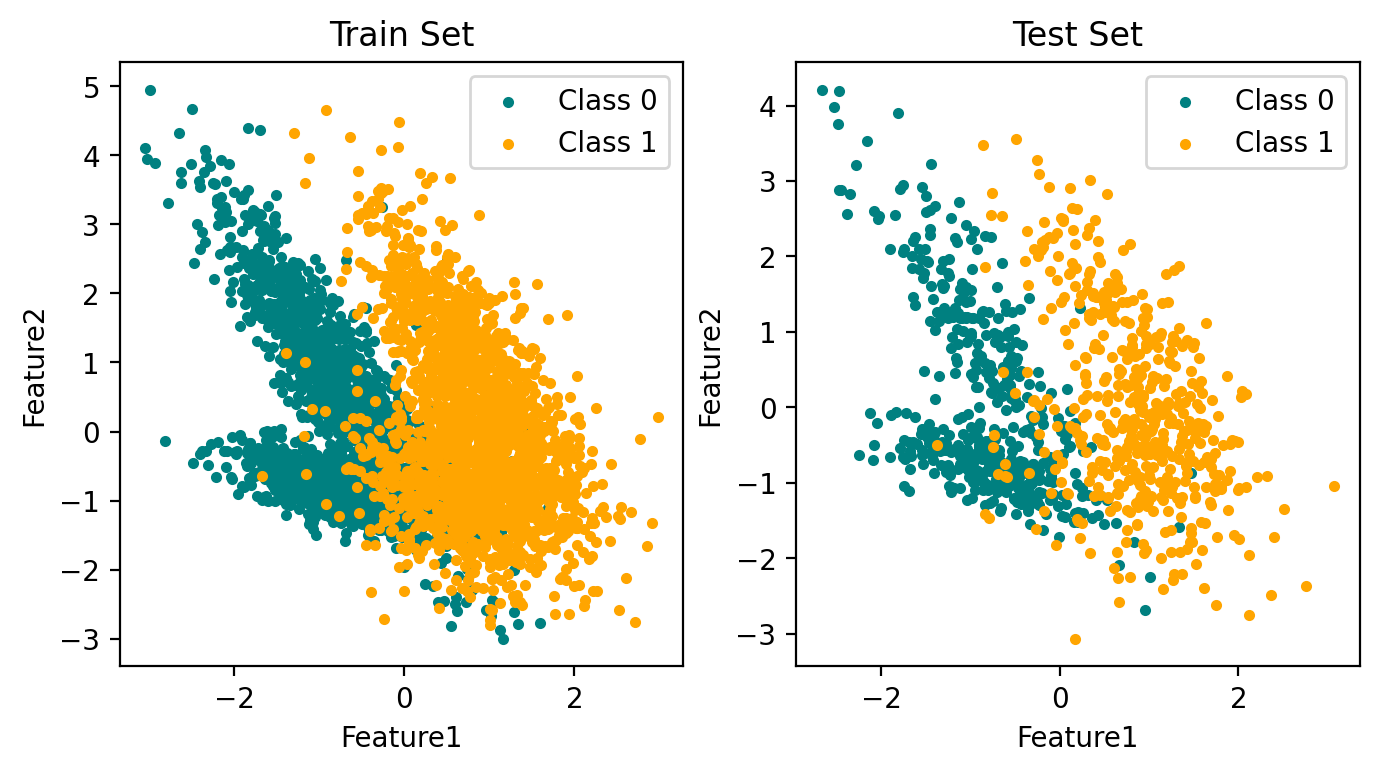

In [35]:
trainRecords = np.loadtxt("../lib/train.csv", delimiter=',', skiprows=1)
testRecords = np.loadtxt("../lib/test.csv", delimiter=',', skiprows=1)

trainSet = trainRecords.T
testSet = testRecords.T

feature1 = trainSet[0]
feature2 = trainSet[1]
label = trainSet[2]

feature1_test = testSet[0]
feature2_test = testSet[1]
label_test = testSet[2]

fig = plt.figure(figsize=(8, 4), dpi=200)

ax1 = fig.add_subplot(1, 2, 1)
class0TrainSet = np.array([record for record in trainRecords if record[2] == 0]).T
class1TrainSet = np.array([record for record in trainRecords if record[2] == 1]).T
ax1.scatter(class0TrainSet[0], class0TrainSet[1], label="Class 0", marker=".", c="teal")
ax1.scatter(class1TrainSet[0], class1TrainSet[1], label="Class 1", marker=".", c="orange")
ax1.set_title("Train Set")
ax1.set_xlabel("Feature1")
ax1.set_ylabel("Feature2")
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
class0TestSet = np.array([record for record in testRecords if record[2] == 0]).T
class1TestSet = np.array([record for record in testRecords if record[2] == 1]).T
ax2.scatter(class0TestSet[0], class0TestSet[1], label="Class 0", marker=".", c="teal")
ax2.scatter(class1TestSet[0], class1TestSet[1], label="Class 1", marker=".", c="orange")
ax2.set_title("Test Set")
ax2.set_xlabel("Feature1")
ax2.set_ylabel("Feature2")
ax2.legend()

plt.show()

### Features Function

A useful function, that generates a feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree:

In [11]:
def features_matrix(features, degree):
    result = []

    for i in range(0, degree + 1):
        for coeffs in polynomial_coefficients(len(features), i, 0):
            terms = [np.power(features[index], coeff) for index, coeff in enumerate(coeffs)]
            result.append(np.prod(terms, axis=0))
    
    return np.array(result)

def polynomial_coefficients(terms, degree, index):
    result = []

    if index == terms - 1:
        return [[degree]]

    for i in range(degree, -1, -1):
        for coeff in polynomial_coefficients(terms, degree - i, index + 1):
            result.append([i] + coeff)

    return result

---

## Problem

### Cost Function

First, we define the **Cost Function** using **SSE** formula:

$$
\begin{aligned}
    & J(\Theta) = \frac{1}{2m} (X\Theta - Y)^T (X\Theta - Y)
\end{aligned}
$$

In [12]:
def cost_function(X, Y, W):
    Error = X @ W - Y
    return (1 / (2 * len(Y))) * (Error.T @ Error)

### Train Function

Now, we use the direct algebraic way for computing the weights:

$$
\begin{aligned}
    & \Theta = (X^T X)^{-1} X^T Y
\end{aligned}
$$

In [13]:
def train_model(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

### Train Models

In this section, we will use our predefined functions for training our models and computing cost values:

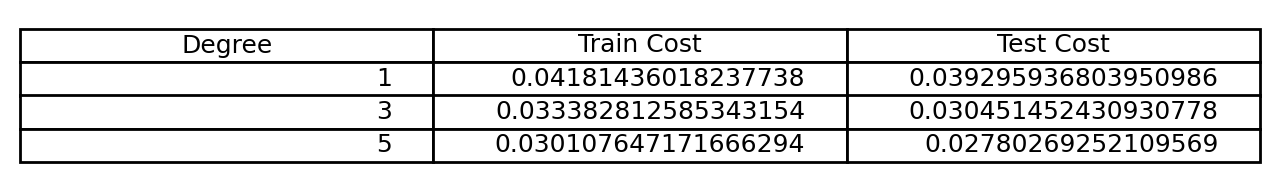

In [14]:
costs = []
for degree in range(1, 7, 2):
    W = train_model(features_matrix([feature1, feature2], degree).T, label)
    costs.append([
        degree,
        cost_function(features_matrix([feature1, feature2], degree).T, label, W),
        cost_function(features_matrix([feature1_test, feature2_test], degree).T, label_test, W)
    ])

plt.figure(figsize=(8, 1), dpi=200)
plt.table(cellText=costs, colLabels=["Degree", "Train Cost", "Test Cost"], loc='center')
plt.axis("off")
plt.show()

### Results

As we can see, the error value for model of degree 1 is too high because it has **Underfitting** problem, the model with degree 3 is a **Good fit** because the actual model formula was from the degree of 3, and the model with degree 5 has introduced some additional errors because of **Overfitting** problem:

- **Degree 1**: Underfit
- **Degree 3**: Goodfit
- **Degree 5**: Overfit

---